In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

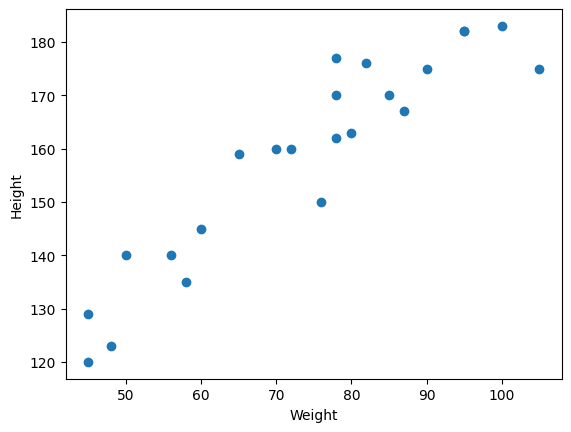

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [16]:
X=df[['Weight']] ### independent Features
y=df['Height']

In [17]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [18]:
X.shape, y.shape

((23, 1), (23,))

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [23]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [24]:
y_train.shape, y_test.shape

((18,), (5,))

In [25]:
# /standard scaling on train and test dataset
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

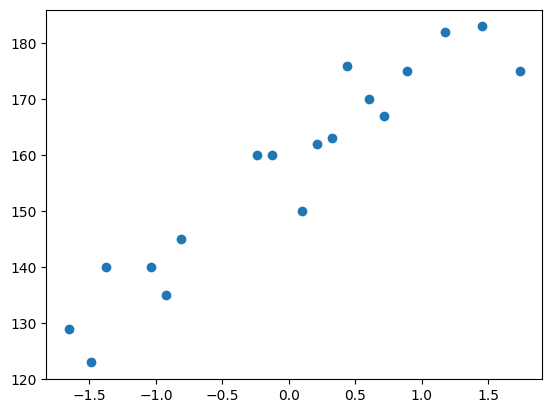

In [34]:
plt.scatter(X_train,y_train)

In [36]:
#Model training
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()

In [38]:
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
regressor.intercept_

157.5

In [40]:
regressor.coef_

array([17.03440872])

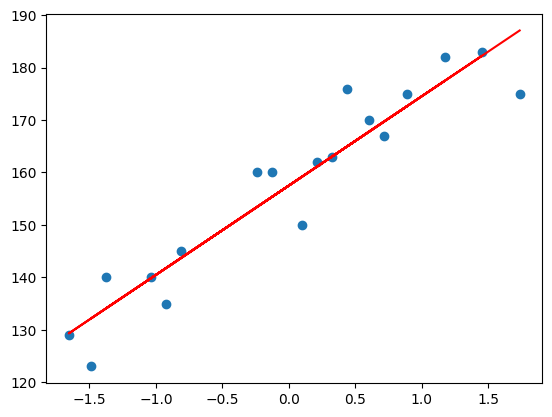

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), 'r')

In [44]:
y_pred_test=regressor.predict(X_test)

In [46]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [47]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [48]:
# performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [52]:
## Accuracy 
## r2 square
from sklearn.metrics import r2_score

In [53]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

In [55]:
# Adjusted r-Square
1-(1-score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [56]:
scaler

StandardScaler()

In [57]:
regressor

LinearRegression()